# <p style="text-align:center;">PROJECT - Heritage Housing Issues</p>

# I. Project outline:

## 1. Client:
- Lydia has inherited four houses in Ames, Iowa, USA, presenting an opportunity for financial gain or loss.
- Lydia, having expertise in Belgian property prices, faces uncertainty about the factors influencing house prices in Ames, Iowa.
- Lydia has found a public dataset with house prices for Ames, Iowa, providing a basis for analysis and prediction.

## 2. Business Case:
- Enhance Lydia's understanding of the Ames, Iowa housing market, accounting for factors that contribute to a house's desirability and value.

- ***Hypothesis: With an objective to increase the house sell price with a renovation, we want to provide insight into price increase upon improved specifications of the inhereted property.***

## 3. Data Science Approach:
- Implement Pandas Profiling and correlations to analyze the dataset comprehensively.
- Visualise the insights
- Develop a regression model which reliably predicts house prices in Ames, Iowa, enabling Lydia to estimate the sales price for her inherited properties and identify remodelling opportunity to increase sell price.

## 4. User interface:
- Utilize Git & GitHub for version control, ensuring effective collaboration and code management.
- Implement a Streamlit interface to provide an interactive dashboard for data exploration and predictions.

# II. Data Understanding:

In [258]:
# load necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [259]:
# dataset of publicly available properties
df= pd.read_csv("house_prices_records.csv")

In [260]:
# first few lines of the table
df.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   
3        540            NaN         642          Unf  ...         60.0   
4        490            0.0         836          RFn  ...         84.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   
3         0.0          35            5            7          756         NaN   
4       350.0          84            5            8         1145         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  
3       1915          1970     140000  
4       2000          2000     250000  

[5 rows x 24 columns]

In [261]:
# column names
df.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')

***Description of columns:***

- 1stFlrSF: First Floor square feet
    - Represents the area of the first floor in square feet.

- 2ndFlrSF: Second floor square feet
    - Indicates the area of the second floor in square feet.

- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
    - Describes the number of bedrooms above ground, excluding those in the basement.

- BsmtExposure: Refers to walkout or garden level walls
    - Describes the level of exposure of the basement walls.
        - Gd: Good Exposure
        - Av: Average Exposure
        - Mn: Minimum Exposure
        - No: No Exposure
        - None: No Basement

- BsmtFinType1: Rating of basement finished area
    - Rates the quality of the finished area in the basement.
        - GLQ: Good Living Quarters
        - ALQ: Average Living Quarters
        - BLQ: Below Average Living Quarters
        - Rec: Average Rec Room
        - LwQ: Low Quality
        - Unf: Unfinished
        - None: No Basement

- BsmtFinSF1: Type 1 finished square feet
    - Represents the finished square feet of the Type 1 basement area.

- BsmtUnfSF: Unfinished square feet of basement area
    - Indicates the unfinished square feet of the basement area.

- TotalBsmtSF: Total square feet of basement area
    - Represents the total square feet of the basement area.

- GarageArea: Size of garage in square feet
    - Describes the size of the garage in square feet.

- GarageFinish: Interior finish of the garage
    - Indicates the interior finish of the garage.
        - Fin: Finished
        - RFn: Rough Finished
        - Unf: Unfinished
        - None: No Garage

- GarageYrBlt: Year garage was built
    - Represents the year the garage was built.

- GrLivArea: Above grade (ground) living area square feet
    - Describes the above-grade living area in square feet.

- KitchenQual: Kitchen quality
    - Rates the quality of the kitchen.
        - Ex: Excellent
        - Gd: Good
        - TA: Typical/Average
        - Fa: Fair
        - Po: Poor

- LotArea: Lot size in square feet
    - Represents the size of the lot in square feet.

- LotFrontage: Linear feet of street connected to property
    - Describes the linear feet of the street connected to the property.

- MasVnrArea: Masonry veneer area in square feet
    - Indicates the area of masonry veneer in square feet.

- EnclosedPorch: Enclosed porch area in square feet
    - Represents the area of the enclosed porch in square feet.

- OpenPorchSF: Open porch area in square feet
    - Indicates the area of the open porch in square feet.

- OverallCond: Rates the overall condition of the house
    - Rates the overall condition of the house on a scale from 1 (Very Poor) to 10 (Very Excellent).

- OverallQual: Rates the overall material and finish of the house
    - Rates the overall material and finish of the house on a scale from 1 (Very Poor) to 10 (Very Excellent).

- WoodDeckSF: Wood deck area in square feet
    - Describes the area of the wood deck in square feet.

- YearBuilt: Original construction date
    - Represents the original construction date of the house.

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
    - Represents the date of remodeling or additions, with the same value as the construction date if no remodeling occurred.

- SalePrice: Sale Price (our Target)
    - Represents the sale price of the house.

In [262]:
# ratio of missing values per column
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

EnclosedPorch    0.906849
WoodDeckSF       0.893836
LotFrontage      0.177397
GarageFinish     0.110959
BsmtFinType1     0.078082
BedroomAbvGr     0.067808
2ndFlrSF         0.058904
GarageYrBlt      0.055479
MasVnrArea       0.005479
1stFlrSF         0.000000
OpenPorchSF      0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
TotalBsmtSF      0.000000
OverallQual      0.000000
OverallCond      0.000000
KitchenQual      0.000000
LotArea          0.000000
GrLivArea        0.000000
GarageArea       0.000000
BsmtUnfSF        0.000000
BsmtFinSF1       0.000000
BsmtExposure     0.000000
SalePrice        0.000000
dtype: float64

<AxesSubplot:>

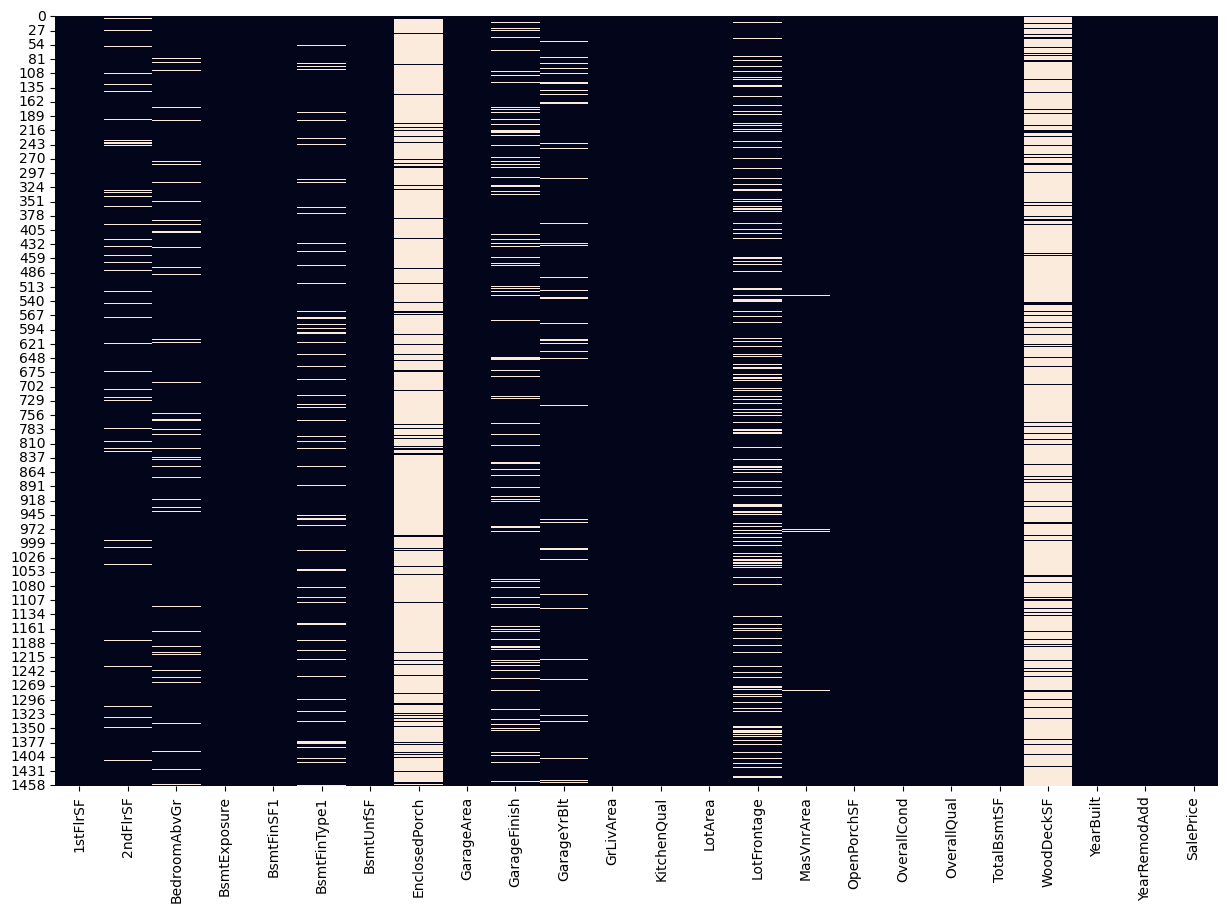

In [263]:
# visual representation of missing values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(), cbar=False)

***Conclusion:***

- 'EnclosedPorch' and 'WoodDeckSF' should be removed due to missing values.

In [264]:
# removal of columns with large number of missing values
df.drop('EnclosedPorch',axis=1,inplace=True)
df.drop('WoodDeckSF',axis=1,inplace=True)

In [265]:
def check_dataframe(df, head=5, tail = 5):
    """ Describe size of the dataframe, datatypes for each column,
    and identify duplicate rows
    """
    print(" SHAPE ".center(82,'~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(" TYPES ".center(82,'~'))
    print(df.dtypes)
    print(' DUPLICATED VALUES '.center(83,'~'))
    print(df.duplicated().sum())

In [266]:
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 1460
Columns: 22
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1stFlrSF          int64
2ndFlrSF        float64
BedroomAbvGr    float64
BsmtExposure     object
BsmtFinSF1        int64
BsmtFinType1     object
BsmtUnfSF         int64
GarageArea        int64
GarageFinish     object
GarageYrBlt     float64
GrLivArea         int64
KitchenQual      object
LotArea           int64
LotFrontage     float64
MasVnrArea      float64
OpenPorchSF       int64
OverallCond       int64
OverallQual       int64
TotalBsmtSF       int64
YearBuilt         int64
YearRemodAdd      int64
SalePrice         int64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ DUPLICATED VALUES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0


***Conlusion:***

- The dataset is composed of 1460 rows and 24 columns.
- Some variables are not in their correct types. To address this, consider converting these variables to the appropriate data types.
- There are no duplicated values.

In [267]:
# check for constant values for all rows
print(" CONSTANTS ".center(82,'~'))
constants=[]
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)
        constants.append(col)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ CONSTANTS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


***Conclusion:***

- There is no constants.

In [268]:
# numerical vs categorical variables
numerics=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtUnfSF','GarageArea','GrLivArea','LotArea','LotFrontage',
          'MasVnrArea','OpenPorchSF','TotalBsmtSF','SalePrice']
categories=['BedroomAbvGr','BsmtExposure','BsmtFinType1','GarageFinish','GarageYrBlt','KitchenQual',
            'OverallCond','OverallQual','YearBuilt','YearRemodAdd']

## 1. Univariate Analysis: 

## Categorical variables:

In [269]:
def binning(year):
    """ Binning categorical variables with year as an
    independent variable."""
    if pd.notna(year):
        year = int(year)
        if 1870 < year <= 1880:
            return "1871-1880"
        elif 1880 < year <= 1890:
            return "1881-1890"
        elif 1890 < year <= 1900:
            return "1891-1900"
        elif 1900 < year <= 1910:
            return "1901-1910"
        elif 1910 < year <= 1920:
            return "1911-1920"
        elif 1920 < year <= 1930:
            return "1921-1930"
        elif 1930 < year <= 1940:
            return "1931-1940"
        elif 1940 < year <= 1950:
            return "1941-1950"
        elif 1950 < year <= 1960:
            return "1951-1960"
        elif 1960 < year <= 1970:
            return "1961-1970"
        elif 1970 < year <= 1980:
            return "1971-1980"
        elif 1980 < year <= 1990:
            return "1981-1990"
        elif 1990 < year <= 2000:
            return "1991-2000"
        elif 2000 < year <= 2010:
            return "2001-2010"
        else:
            return "Unknown"
    else:
        return "Unknown"

In [270]:
# apply binning to relevant columns
df['GarageYrBlt'] = df['GarageYrBlt'].apply(binning)
df['YearBuilt'] = df['YearBuilt'].apply(binning)
df['YearRemodAdd'] = df['YearRemodAdd'].apply(binning)

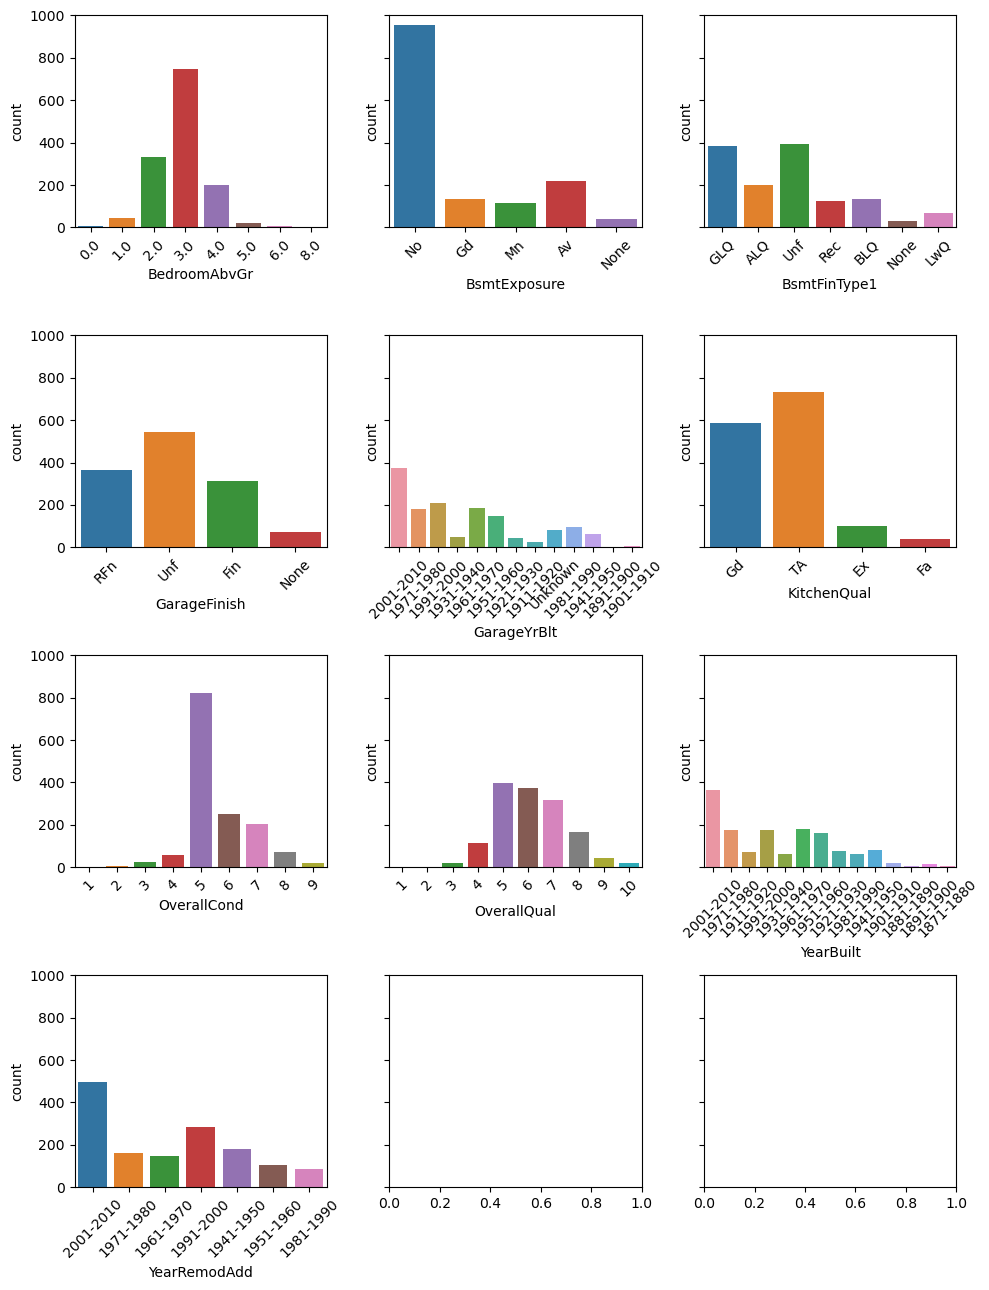

In [271]:
# plot categorical variables, value count per category
fig, ax = plt.subplots(4, 3, figsize=(10, 13), sharey=True)
for i, col in enumerate([category for category in categories if category not in constants]):
    sns.countplot(ax=ax[i//3, i%3], x=col, data=df)
    ax[i//3, i%3].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

***Conclusion:*** 

- The analysis reveals either uniform/smooth distribution of values (such as BsmtFinSF1, YearRemodAdd), or normal/lognormal distribution (OverallCond, OverallQual, BedroomAbvGr etc.) of the categorical variables.

## Numerical variables:
- histograms to reveal distribution of continuous features.
- boxplots visualize clearly mean and stadard deviation to identify potential outliers.

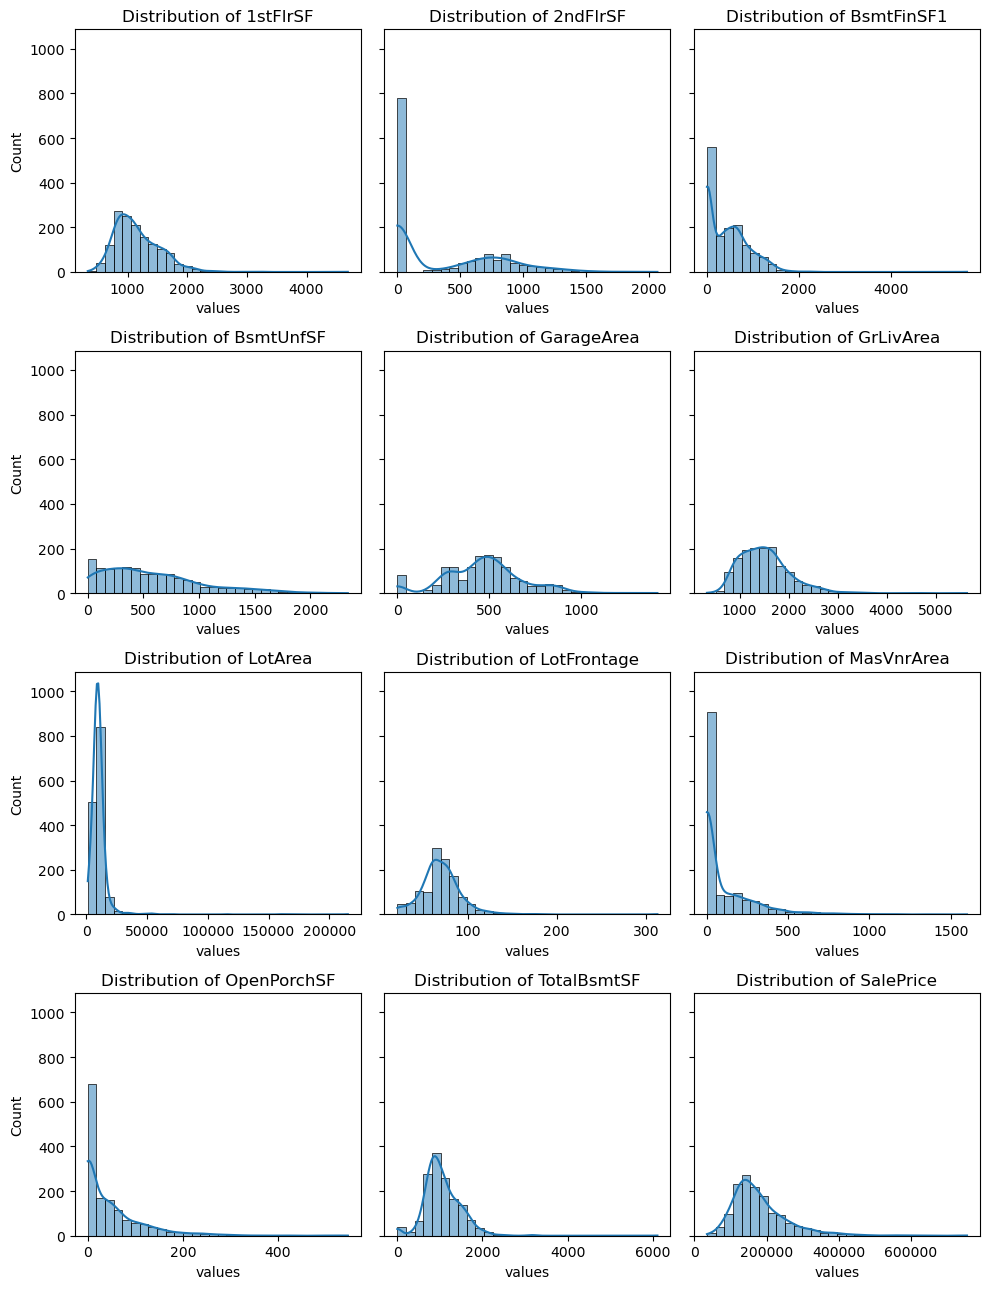

In [272]:
# histogramsper numerical feature
fig, ax = plt.subplots(4, 3, figsize=(10, 13), sharey=True)
for i, col in enumerate(numerics):
    sns.histplot(ax=ax[i//3, i%3], data=df[col], bins=30, kde=True)
    ax[i//3, i%3].set(xlabel='values', ylabel='Count', title=f'Distribution of {col}')
plt.tight_layout()
plt.show()

***Conclusion:***

- Some distributions are log-normal, while others lack a clear pattern.
- Scaling will be applied for the predictive regression model  to adapt for the varying data value ranges.

In [273]:
# boxplot per numerical variable
fig, ax = plt.subplots(4, 3, figsize=(10, 13), sharey=True)
for i, col in enumerate(numerics):
    sns.boxplot(ax=ax[i//3, i%3], x=df[col])
    ax[i//3, i%3].set(xlabel='values', title=f'Boxplot of {col}')
plt.tight_layout()
plt.show()

***Conclusion:*** 

- The analysis reveals the presence of outliers in the numerical variables.

## 2. Bi-variable Analysis: 

## Categorical vs Target

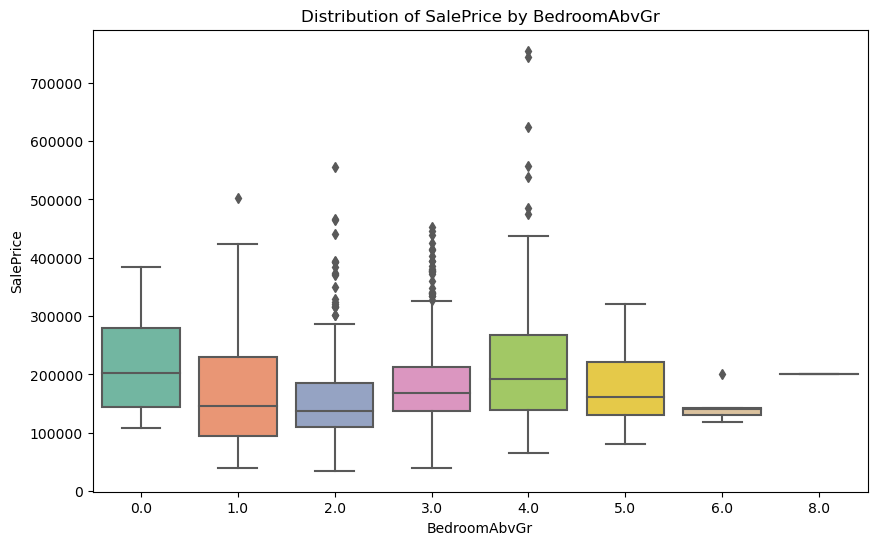

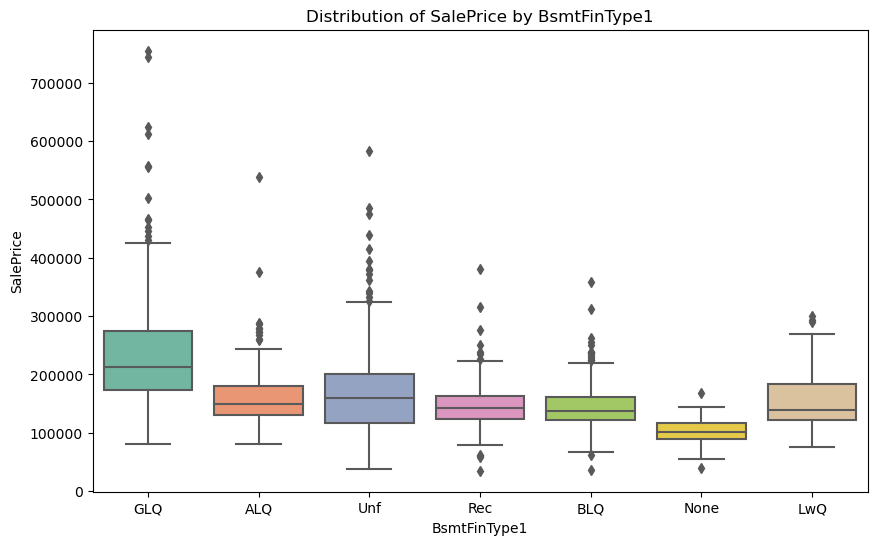

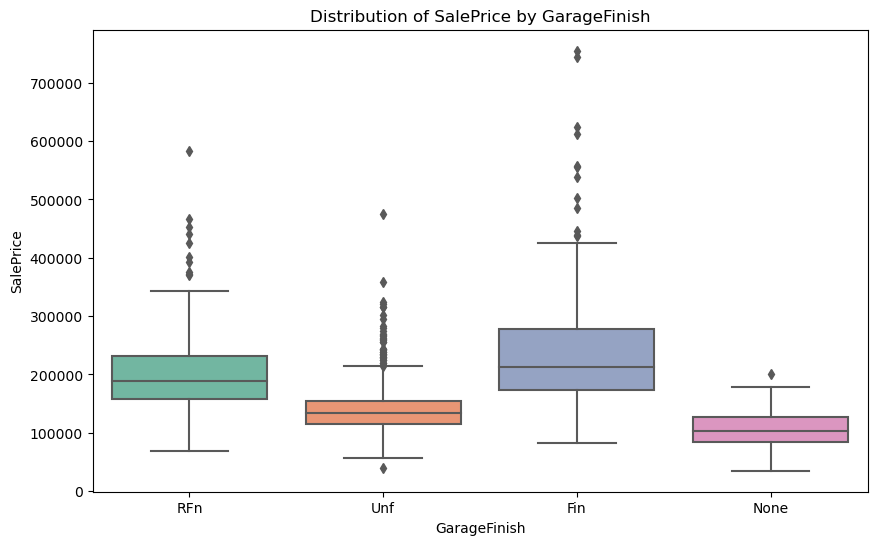

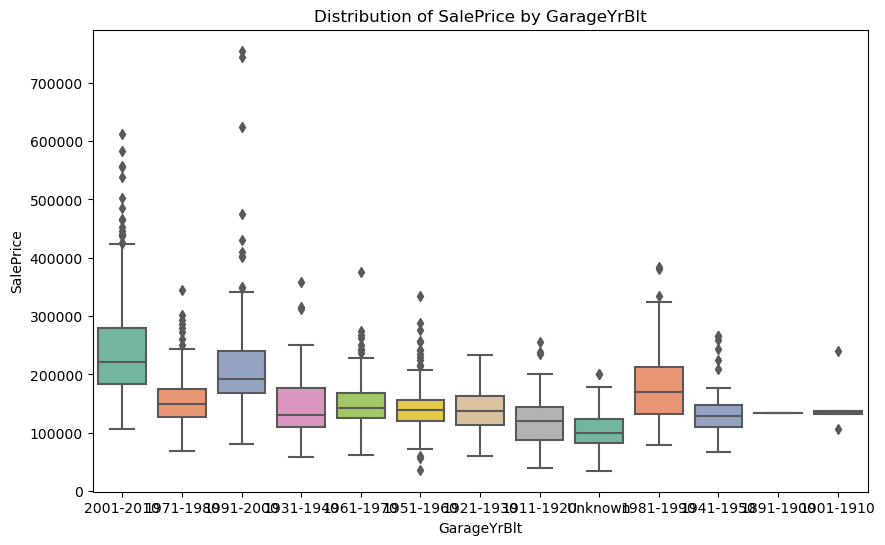

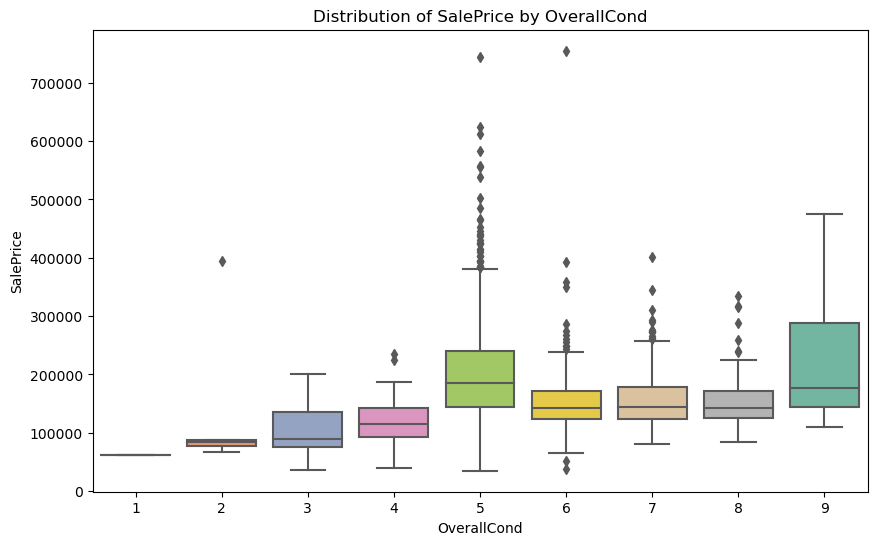

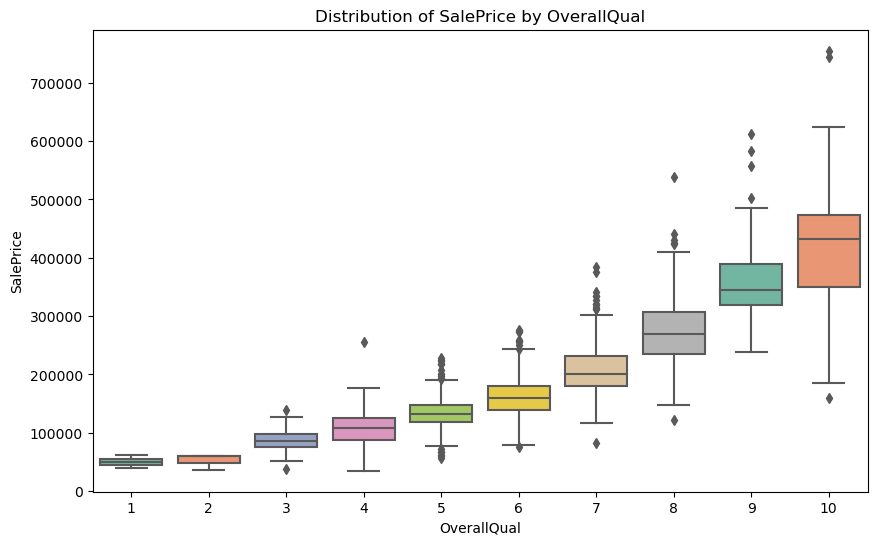

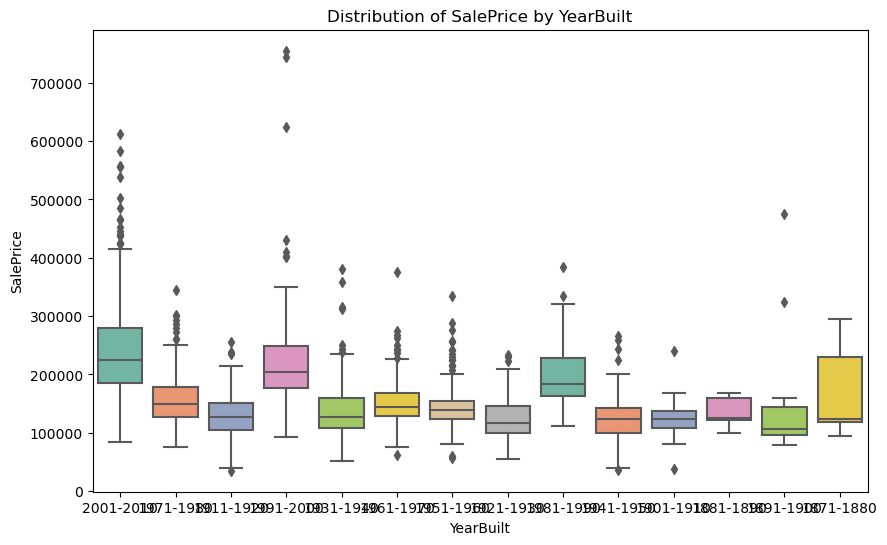

In [274]:
# plot all categorical values vs sales price
target_variable = 'SalePrice'
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=category, y=target_variable, data=df, palette="Set2")
    plt.title(f'Distribution of {target_variable} by {category}')
    plt.xlabel(category)
    plt.ylabel(target_variable)
    plt.show()

***Conclusion:***

- We can observe the variation of means of 'SalePrice' from one category to another for most features. We can say that Categorical variables are correlated with the target.
- Not surprisingly, the overall quality assessment present the clearest correlation with the sale price.

## Numerical vs Target
- Correlation matrix identifies features which correlate strongly with each other
- We are particularly interested in correlation with SalePrice
- Higly colinear features can be identified, which can lead to overfitting.

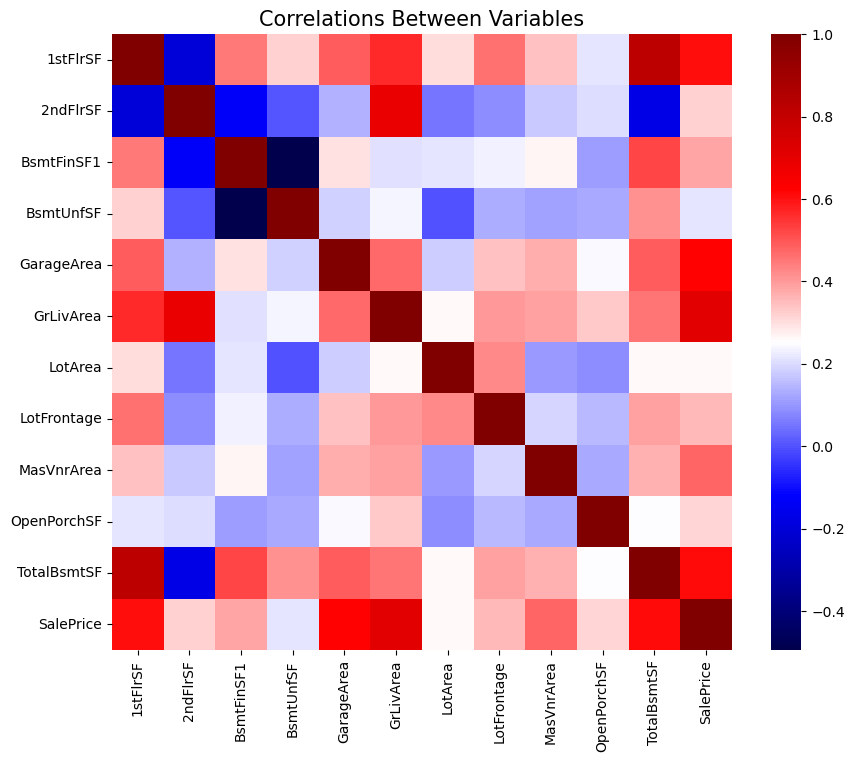

In [275]:
# correlation matrix between variable
plt.figure(figsize=(10,8))
sns.heatmap(df[numerics].corr(), cmap='seismic')
plt.title("Correlations Between Variables", size=15)
plt.show()

***Conclusion:***

- We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method, which is the default value of parameter "method" in corr() function.
- No strongly covariant variables identified (features describing the same house property, such as TotalBsmtSF and 1stFlSF)

In [276]:
important_num_cols = list(df[numerics].corr()["SalePrice"][(df[numerics].corr()["SalePrice"]>0.50) | (df[numerics].corr()["SalePrice"]<-0.50)].index)

In [277]:
important_num_cols

['1stFlrSF', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']

In [278]:
sns.pairplot(df[important_num_cols])

***Conclusion:***

- The pair plot shows some linear correlations, but they are not very strong.

# III. Data Preparation:

In [279]:
# selected columns
important_num_cols.remove('SalePrice')
important_cols = important_num_cols + categories + ['SalePrice']
df = df[important_cols]

In [280]:
df.shape

(1460, 15)

## 1. Handling Null Values:

In [281]:
# ratio of Nans
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

GarageFinish    0.110959
BsmtFinType1    0.078082
BedroomAbvGr    0.067808
1stFlrSF        0.000000
GarageArea      0.000000
GrLivArea       0.000000
TotalBsmtSF     0.000000
BsmtExposure    0.000000
GarageYrBlt     0.000000
KitchenQual     0.000000
OverallCond     0.000000
OverallQual     0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
SalePrice       0.000000
dtype: float64

***Note:***

We will come back to deal with null values once we complete the other preprocessing steps.

## 3. Encoding
- categorical values will be encoded to integers

In [282]:
from sklearn.preprocessing import LabelEncoder

In [283]:
columns_to_encode = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual','GarageYrBlt','YearBuilt','YearRemodAdd']

In [284]:
for column in columns_to_encode:
    print(df[column].value_counts(),end="\n \n")

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
 
Unf     396
GLQ     385
ALQ     202
BLQ     136
Rec     126
LwQ      70
None     31
Name: BsmtFinType1, dtype: int64
 
Unf     546
RFn     366
Fin     313
None     73
Name: GarageFinish, dtype: int64
 
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
 
2001-2010    375
1991-2000    207
1961-1970    186
1971-1980    181
1951-1960    146
1981-1990     96
Unknown       81
1941-1950     65
1931-1940     47
1921-1930     45
1911-1920     25
1901-1910      5
1891-1900      1
Name: GarageYrBlt, dtype: int64
 
2001-2010    364
1961-1970    182
1991-2000    175
1971-1980    174
1951-1960    164
1941-1950     81
1921-1930     76
1911-1920     71
1931-1940     63
1981-1990     63
1901-1910     22
1891-1900     14
1871-1880      6
1881-1890      5
Name: YearBuilt, dtype: int64
 
2001-2010    497
1991-2000    285
1941-1950    178
1971-1980    159
1961-1970    149
1951-1960    106
19

### encode features one by one

In [285]:
# BsmtExposure column
encBsmtExposure = LabelEncoder()
df['BsmtExposure'] = encBsmtExposure.fit_transform(df['BsmtExposure'].astype(str))
encBsmtExposure.inverse_transform(np.array([0,1,2,3,4]))

array(['Av', 'Gd', 'Mn', 'No', 'None'], dtype=object)

In [286]:
# BsmtFinType1 column
encBsmtFinType1 = LabelEncoder()
df['BsmtFinType1'] = encBsmtFinType1.fit_transform(df['BsmtFinType1'].astype(str))
encBsmtFinType1.inverse_transform(np.array([0,1,2,3,4,5,6,7]))

array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf', 'nan'],
      dtype=object)

In [287]:
# convert integer back to np.nan
def back_to_nan(row):
    if row == 7:
        return np.nan
    return int(row)

# convert the column
df['BsmtFinType1'] = df['BsmtFinType1'].apply(back_to_nan)

In [288]:
# GarageFinish column
encGarageFinish = LabelEncoder()
df['GarageFinish'] = encGarageFinish.fit_transform(df['GarageFinish'].astype(str))
encGarageFinish.inverse_transform(np.array([0,1,2,3,4]))

array(['Fin', 'None', 'RFn', 'Unf', 'nan'], dtype=object)

In [289]:
# convert integer back to np.nan
def back_to_nan(row):
    if row == 4:
        return np.nan
    return int(row)

# convert the column
df['GarageFinish'] = df['GarageFinish'].apply(back_to_nan)

In [290]:
# KitchenQual column
encKitchenQual = LabelEncoder()
df['KitchenQual'] = encKitchenQual.fit_transform(df['KitchenQual'].astype(str))
encKitchenQual.inverse_transform(np.array([0,1,2,3]))

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

In [291]:
# GarageYrBlt column
encGarageYrBlt = LabelEncoder()
df['GarageYrBlt'] = encGarageYrBlt.fit_transform(df['GarageYrBlt'].astype(str))
encGarageYrBlt.inverse_transform(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12]))

array(['1891-1900', '1901-1910', '1911-1920', '1921-1930', '1931-1940',
       '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990',
       '1991-2000', '2001-2010', 'Unknown'], dtype=object)

In [292]:
# YearBuilt column
encYearBuilt = LabelEncoder()
df['YearBuilt'] = encYearBuilt.fit_transform(df['YearBuilt'].astype(str))
encYearBuilt.inverse_transform(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13]))

array(['1871-1880', '1881-1890', '1891-1900', '1901-1910', '1911-1920',
       '1921-1930', '1931-1940', '1941-1950', '1951-1960', '1961-1970',
       '1971-1980', '1981-1990', '1991-2000', '2001-2010'], dtype=object)

In [293]:
# YearRemodAdd column
encYearRemodAdd = LabelEncoder()
df['YearRemodAdd'] = encYearRemodAdd.fit_transform(df['YearRemodAdd'].astype(str))
encYearRemodAdd.inverse_transform(np.array([0,1,2,3,4,5,6]))

array(['1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990',
       '1991-2000', '2001-2010'], dtype=object)

In [294]:
df.head()

1stFlrSF  GarageArea  GrLivArea  TotalBsmtSF  BedroomAbvGr  BsmtExposure  \
0       856         548       1710          856           3.0             3   
1      1262         460       1262         1262           3.0             1   
2       920         608       1786          920           3.0             2   
3       961         642       1717          756           NaN             3   
4      1145         836       2198         1145           4.0             0   

   BsmtFinType1  GarageFinish  GarageYrBlt  KitchenQual  OverallCond  \
0           2.0           2.0           11            2            5   
1           0.0           2.0            8            3            8   
2           2.0           2.0           11            2            5   
3           0.0           3.0           10            2            5   
4           2.0           2.0           10            2            5   

   OverallQual  YearBuilt  YearRemodAdd  SalePrice  
0            7         13             6     208500  
1            6         10             3     181500  
2            7         13             6     223500  
3            7          4             2     140000  
4            8         12             5     250000

In [295]:
df.isna().sum()

1stFlrSF          0
GarageArea        0
GrLivArea         0
TotalBsmtSF       0
BedroomAbvGr     99
BsmtExposure      0
BsmtFinType1    114
GarageFinish    162
GarageYrBlt       0
KitchenQual       0
OverallCond       0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
SalePrice         0
dtype: int64

## 4. Imputation
- replace missing values with the most common value in the feature

In [296]:
from sklearn.impute import SimpleImputer

In [297]:
columns_to_impute = ['BedroomAbvGr', 'BsmtFinType1', 'GarageFinish']  # cols with missing values

# imputer and method
imputer = SimpleImputer(strategy='most_frequent')

# transform the dataframe
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [298]:
# confirm nans
df.isna().sum()

1stFlrSF        0
GarageArea      0
GrLivArea       0
TotalBsmtSF     0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinType1    0
GarageFinish    0
GarageYrBlt     0
KitchenQual     0
OverallCond     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

## 5. Standardization
- standard scaler substract the mean and divides by standard deviation.

In [299]:
from sklearn.preprocessing import StandardScaler

In [300]:
scaler = StandardScaler()
df[important_num_cols] = scaler.fit_transform(df[important_num_cols])

## 6.Data type Conversion:
- convert BedroomAbvGr, BsmtFinType1, GarageFinish from float to integer features. 

In [301]:
df['BedroomAbvGr']= df['BedroomAbvGr'].astype(int)
df['BsmtFinType1']= df['BsmtFinType1'].astype(int)
df['GarageFinish']= df['GarageFinish'].astype(int)

In [302]:
df.head()

1stFlrSF  GarageArea  GrLivArea  TotalBsmtSF  BedroomAbvGr  BsmtExposure  \
0 -0.793434    0.351000   0.370333    -0.459303             3             3   
1  0.257140   -0.060731  -0.482512     0.466465             3             1   
2 -0.627826    0.631726   0.515013    -0.313369             3             2   
3 -0.521734    0.790804   0.383659    -0.687324             3             3   
4 -0.045611    1.698485   1.299326     0.199680             4             0   

   BsmtFinType1  GarageFinish  GarageYrBlt  KitchenQual  OverallCond  \
0             2             2           11            2            5   
1             0             2            8            3            8   
2             2             2           11            2            5   
3             0             3           10            2            5   
4             2             2           10            2            5   

   OverallQual  YearBuilt  YearRemodAdd  SalePrice  
0            7         13             6     208500  
1            6         10             3     181500  
2            7         13             6     223500  
3            7          4             2     140000  
4            8         12             5     250000

## 7. Train-Test split:

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
# X are features, y is target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [305]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IV. Modeling & Evaluation:
- identify best regression model

In [306]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [307]:
def rmse_cv(model, number_cv: int=5) -> float:
    """ Return root mean squared error for
    number of cross-validation runs.
    Args:
        number_cv(int): Number of crossvalidation runs
        
    Return:
        rmse(float): Cross-validation float value.
    """
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=number_cv)).mean()
    return rmse
    

def evaluation(y, predictions) -> tuple[float]:
    """ Calculate several standard regression metrics
    and return as tuple
    1. Mean absolute error (mae)
    2. Mean squared error (mse)
    3. Root mean squared error (rmse)
    4. R2 score
    """
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [308]:
# define dataframe for the comparison of models' metrics 
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## 1. Linear Regression

In [309]:
# define, fit and predict using linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

# evaluate and print metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

# add to the DF
new_row = {"Model": "Linear Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 22580.150354302343
MSE: 1348934843.9668655
RMSE: 36727.84834382305
R2 Score: 0.8241359223154149
------------------------------
RMSE Cross-Validation: 36078.31960411523


## 2. Lasso Regression

In [310]:
# define, fit and predict using lasso regression
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

# evaluate and print metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

# add to the DF
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 22580.16802412856
MSE: 1348972685.1927047
RMSE: 36728.36349733955
R2 Score: 0.8241309888582429
------------------------------
RMSE Cross-Validation: 36078.23214904001


## 3. Elastic Net

In [311]:
# define, fit and predict using elastic Net
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

# evaluate and print metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

# add to the DF
new_row = {"Model": "Elastic Net","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23305.06842525913
MSE: 1606462683.7092788
RMSE: 40080.702135931686
R2 Score: 0.7905613607144873
------------------------------
RMSE Cross-Validation: 37160.6254201861


## 4. SVM 

In [312]:
# define, fit and predict using support vector machines
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

# evaluate and print metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

# add to the DF
new_row = {"Model": "SVM","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18166.80802317399
MSE: 1004815858.3487926
RMSE: 31698.83055175368
R2 Score: 0.8689995925587525
------------------------------
RMSE Cross-Validation: 29956.459284314227


## 5. Random Forest Regressor

In [313]:
# define, fit and predict using random forest regression
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

# evaluate and print metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

# add to the DF
new_row = {"Model": "Random Forest Regressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18284.704691780822
MSE: 924279152.0480008
RMSE: 30401.95967446837
R2 Score: 0.8794993684646752
------------------------------
RMSE Cross-Validation: 31084.922006927827


## 6. XGBoost Regressor

In [314]:
# define, fit and predict using XGBoost regression
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

# evaluate and print metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

# add to the DF
new_row = {"Model": "XGB Regressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 17919.48048212757
MSE: 818492567.258195
RMSE: 28609.309101378087
R2 Score: 0.893291035459318
------------------------------
RMSE Cross-Validation: 30359.774379481452


## 7. Polynomial Regression (degree 2)

In [315]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

# evaluate and print metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

# add to the DF
new_row = {"Model": "Polynomial Regression (degree 2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20705.582259747884
MSE: 1159204517.9384465
RMSE: 34047.092650304905
R2 Score: 0.8488715490545542
------------------------------
RMSE Cross-Validation: 36078.31960411523


## 8. Models Comparison

In [316]:
models.sort_values(by="R2 Score", ascending= False)

Model           MAE           MSE          RMSE  \
5                     XGB Regressor  17919.480482  8.184926e+08  28609.309101   
4           Random Forest Regressor  18284.704692  9.242792e+08  30401.959674   
3                               SVM  18166.808023  1.004816e+09  31698.830552   
6  Polynomial Regression (degree 2)  20705.582260  1.159205e+09  34047.092650   
0                 Linear Regression  22580.150354  1.348935e+09  36727.848344   
1                             Lasso  22580.168024  1.348973e+09  36728.363497   
2                       Elastic Net  23305.068425  1.606463e+09  40080.702136   

   R2 Score  RMSE (Cross-Validation)  
5  0.893291             30359.774379  
4  0.879499             31084.922007  
3  0.869000             29956.459284  
6  0.848872             36078.319604  
0  0.824136             36078.319604  
1  0.824131             36078.232149  
2  0.790561             37160.625420

In [317]:
# visual comparison of base models.
plt.figure(figsize=(8,5))
sns.barplot(x=models["Model"], y=models["R2 Score"])
plt.title("Models' R2 Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

***Conclusion:***
    
- XGBoost Regressor has the highest R2 score, making it the best model to choose.

## 9. Optimize XGBoost model:

***Optimize***
- Hyperparameter search

***Fix shortcommings***
- Test automatic column selection.
- Get a sense of train vs test metrics in respect to column selection.
- Visual presentation of optimization
- Visual presentation of train and test predictions

***Other shortcommings (not fixed)***
- scaler should not be used on the whole dataset, but on the train data only
- Imputation should be also performed from the train data only.

In [318]:
from sklearn.feature_selection import SelectKBest, r_regression
    
def runRegression(DF, test_size=0.2, k=None, n_est=1000, lr=0.01):
    """Run whole regression from the dataframe, test-train split,
    k-features selector, fit linear regression, make train test predictions,
    calculate r2 score.

    Args:
        DF: dataframe
        test_size (float): ratio of test samples for split
        k (int): If int, defines how many features are selected from the DF. Defaults to None.
    Returns:
        df_test (pd.DataFrame): test split part of DF
        y_train: training values, train
        y_train_pred: model predictions from train data
        r2_test: r2 score on test data
        r2_train: r2 score on train data
        X_train, X_test, y_test: Rest of the output from train_test_split()
    """
    X = df.drop("SalePrice", axis=1)
    y = df["SalePrice"]
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size,
                                                        random_state=42,
                                                        )
    if k is not None:
        selector = SelectKBest(r_regression, k=k)
        selector.fit(X_train, y_train)
        X_train = X_train[selector.get_feature_names_out()]
        X_test = X_test[selector.get_feature_names_out()]
        
    xgb = XGBRegressor(n_estimators=n_est, learning_rate=lr)
    xgb.fit(X_train, y_train)
    y_test_pred = xgb.predict(X_test)

    # predict from model, input is only X_test, y_pred should be close to y_test, wchich is the round truth
    y_test_pred = xgb.predict(X_test)
    # making it into a series with correct index
    sy_pred = pd.Series(y_test_pred, index=X_test.index, name='y_pred')
    
    # merge predictions on test DF
    df_test = DF.merge(sy_pred, left_index=True, right_index=True)
    df_test = df_test.merge(X_test)
    r2_test = r2_score(y_true=df_test['SalePrice'],
                       y_pred=df_test['y_pred'],
                       sample_weight=None)
    
    # Train predictions
    # predict from model, input is only X_test, y_pred should be close to y_test, wchich is the ground truth
    y_train_pred = xgb.predict(X_train)
    # making it into a series with correct index
    sy_train_pred = pd.Series(y_train_pred, index=X_train.index, name='y_train_pred')
    r2_train = r2_score(y_true=y_train,
                        y_pred=y_train_pred,
                        sample_weight=None)
    return df_test, y_train, y_train_pred, r2_test, r2_train, X_train, X_test, y_train, y_test

def plotRegResult(df_test, y_train, y_train_pred, r2_test=None, r2_train=None):
    """Plot train test model performance in two subplots"""
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
    sns.scatterplot(ax=ax[0],
                    x=df_test['SalePrice'],
                    y=df_test['y_pred'],
                    )
    ax[0].plot(range(700000), range(700000), 'k')
    ax[0].title.set_text(f'Test: r2={r2_test:0.2f}')

    sns.scatterplot(ax=ax[1], x=y_train, y=y_train_pred)
    ax[1].title.set_text(f'Train: r2={r2_train:0.2f}')
    ax[1].plot(range(700000), range(700000), 'k')
    plt.show()

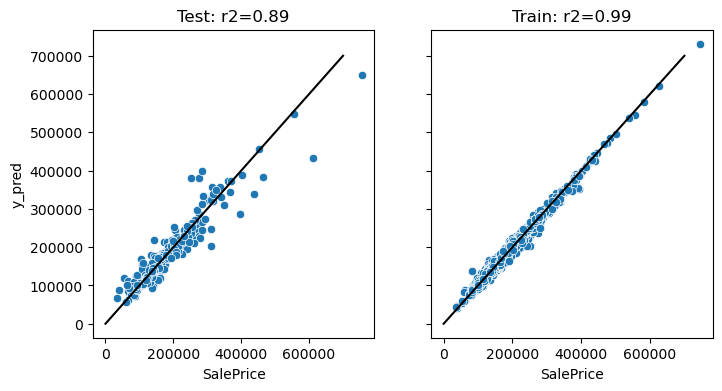

In [319]:
df_test, y_train, y_train_pred, r2_test, r2_train, *_ = runRegression(df)
# This is where you can see the comparison between the two models.
plotRegResult(df_test, y_train, y_train_pred, r2_test, r2_train)

***Conclusion:***
    
- This looks like overfitting. Apply feature selection to investigate.

### Feature selection and tracking r2 scores for train and test

In [320]:
# regression for loop using KBest selector on all features
ks, lst_r2_train, lst_r2_test = [], [], []
for k in range(2, 15):
    # feature selection and regression
    df_test, y_train, y_train_pred, r2_test, r2_train, *_ = runRegression(df, k=k)

    # append parameters
    lst_r2_train.append(r2_train)
    lst_r2_test.append(r2_test)
    ks.append(k)

In [321]:
# plot r2 versus k
plt.plot(ks, lst_r2_train, 'o', label=f'train max:{max(lst_r2_train):0.2f}')
plt.plot(ks, lst_r2_test, 'o', label=f'test max:{max(lst_r2_test):0.2f}')
plt.xlabel('# selected features')
plt.ylabel('r2 score')
plt.legend()
plt.title('Performance of feature_selection.SelectKBest')
plt.ylim([0.5, 1])
plt.tight_layout()
plt.show()

***Conclusion:***
    
- No overfitting. I can leave all the features in, which is beneficial for the business case, because I can track price changes along every feature direction.

### Hyperparameter search

In [322]:
params, lst_r2_train, lst_r2_test = [], [], []

# run xgb param search
for n in [200, 500, 1000, 1500]:
    for lr in [1e-3, 1e-2, 1e-1]:
        df_test, y_train, y_train_pred, r2_test, r2_train, *_ = runRegression(df, k=14,
                                                                              n_est=n,
                                                                              lr=lr)
        # append parameters
        lst_r2_train.append(r2_train)
        lst_r2_test.append(r2_test)
        params.append((n, lr))

In [323]:
# plot r2 versus params
x_axis = [str(k) for k in params]
plt.plot(x_axis, lst_r2_train, 'o', label=f'train max:{max(lst_r2_train):0.2f}')
plt.plot(x_axis, lst_r2_test, 'o', label=f'test max:{max(lst_r2_test):0.2f}')
plt.xticks(rotation=45)
plt.xlabel('# selected features')
plt.ylabel('r2 score')
# plt.legend(loc='lower left')
plt.legend()
plt.title('Performance of feature_selection.SelectKBest')
# plt.ylim([0.5, 1])
plt.tight_layout()
plt.show()

***Conclusion:***
    
- Optimal parameters seem to be n=500, and lr=0.01
- Even though hyperparameter scanning cannot be decoupled from the feature selection, since n=1000, and lr=0.01 give a good result here, it is fairly robust result

## 10. Final model:
- we confirmed quality and robustness of the model in respect to wide range of:
    - feteare combinations
    - choice of hyperparameters for XGBoost regression 

In [339]:
# fit final model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    )
# no selector, taking all features
xgb = XGBRegressor(n_estimators=500, learning_rate=0.01)
xgb.fit(X_train, y_train)
y_test_pred = xgb.predict(X_test)

In [343]:
import joblib

# saving pipeline operators for dashboard use
joblib.dump(scaler, "scaler.save")
joblib.dump(xgb, "model.save")
joblib.dump(imputer, "imputer.save")
joblib.dump(encBsmtExposure, "encBsmtExposure.save")
joblib.dump(encBsmtFinType1, "encBsmtFinType1.save")
joblib.dump(encGarageFinish, "encGarageFinish.save")
joblib.dump(encKitchenQual, "encKitchenQual.save")
joblib.dump(encGarageYrBlt, "encGarageYrBlt.save")
joblib.dump(encYearBuilt, "encYearBuilt.save")
joblib.dump(encYearRemodAdd, "encYearRemodAdd.save")

['encYearRemodAdd.save']

# V. Back to business:
- with the best model, we want to see how upgrade in the property results in an increase of SalePrice.
- Such information corraborated with a construction company can identify renovation investment return.

In [511]:
def process_inhereted(df):
    """ binning, encoding, scaling, imputing of
    new data entry
    """
    # apply binning to relevant columns
    df['GarageYrBlt'] = df['GarageYrBlt'].apply(binning)
    df['YearBuilt'] = df['YearBuilt'].apply(binning)
    df['YearRemodAdd'] = df['YearRemodAdd'].apply(binning)
    
    # encoding
    df['BsmtExposure'] = encBsmtExposure.transform(df['BsmtExposure'].astype(str))
    df['BsmtFinType1'] = encBsmtFinType1.fit_transform(df['BsmtFinType1'].astype(str))
    df['GarageFinish'] = encGarageFinish.fit_transform(df['GarageFinish'].astype(str))
    df['KitchenQual'] = encKitchenQual.fit_transform(df['KitchenQual'].astype(str))
    df['GarageYrBlt'] = encGarageYrBlt.fit_transform(df['GarageYrBlt'].astype(str))
    df['YearBuilt'] = encYearBuilt.fit_transform(df['YearBuilt'].astype(str))
    df['YearRemodAdd'] = encYearRemodAdd.fit_transform(df['YearRemodAdd'].astype(str))
    
    df[columns_to_impute] = imputer.transform(df[columns_to_impute])
    df[important_num_cols] = scaler.transform(df[important_num_cols])
    return df

def increase_feature(df, col_name: str):
    """ Increase numerical variable by 10% or categorical variable
    by one point.
    """
    print(col_name)
    if df[col_name].dtype in [np.dtype(np.int32), np.dtype(np.int64)]:  # categorical
        df[col_name] = df[col_name] + 1
    elif df[col_name].dtype in [np.dtype(np.float32), np.dtype(np.float64)]:
        df[col_name] = df[col_name] * 1.1  # 10% increase
    else:
        pass

    return df

def increase_vs_base(base_pred, new_pred):
    diff = new_pred - base_pred
    rel_increase = diff / base_pred * 100  # in percents
    return diff, rel_increase

In [512]:
# processing inherited properties.
df_inh = pd.read_csv('inherited_houses.csv')
df_base = df_inh.copy()
df_base = process_inhereted(df_base)
df_base = df_base[X_train.columns]

# baseline prediction
base_pred = xgb.predict(df_base)
print(" Base prediction ".center(82,'~'))
for i, price in enumerate(base_pred):
    print(f'House {i}: {price:.2f} $')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Base prediction ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
House 0: 126527.59 $
House 1: 141750.83 $
House 2: 138051.88 $
House 3: 172876.98 $


In [514]:
# increase feature one by one and evaluate predicted increase in price
for column in X_train.columns:
    df2 = df_inh.copy()
    df2 = increase_feature(df2, column)
    df2 = process_inhereted(df2)
    df2 = df2[X_train.columns]
    pred = xgb.predict(df2)

    abs_diff, rel_increase = increase_vs_base(base_pred, pred)
    print(f" {column} ".center(82,'~'))
    for i, price in enumerate(pred):
        print(f'House {i}: ABS increase {abs_diff[i]:.2f} $, Relative increase {rel_increase[i]:.2f} %')
    

1stFlrSF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 1stFlrSF ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
House 0: ABS increase 0.00 $, Relative increase 0.00 %
House 1: ABS increase 0.00 $, Relative increase 0.00 %
House 2: ABS increase 0.00 $, Relative increase 0.00 %
House 3: ABS increase 0.00 $, Relative increase 0.00 %
GarageArea
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ GarageArea ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
House 0: ABS increase 0.00 $, Relative increase 0.00 %
House 1: ABS increase 0.00 $, Relative increase 0.00 %
House 2: ABS increase 2095.56 $, Relative increase 1.52 %
House 3: ABS increase 1758.75 $, Relative increase 1.02 %
GrLivArea
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ GrLivArea ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
House 0: ABS increase 0.00 $, Relative increase 0.00 %
House 1: ABS increase 0.00 $, Relative increase 0.00 %
House 2: ABS increase 0.00 $, Relative increase 0.00 %
House 3: ABS increase 0.00 $, Relative increase 0.00 %
TotalBsmtSF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TotalBsm

In [401]:
# feature importance
xgb.feature_importances_

(array([0.01276021, 0.01277404, 0.05218584, 0.02665568, 0.00764983,
        0.0112541 , 0.01151725, 0.00757968, 0.00966525, 0.02330256,
        0.01068379, 0.77542675, 0.02466709, 0.01387792], dtype=float32),)

***Conclusion:***
    
- Feature importance suggests that OverallQual, OverallCond and TotalBsmtSF are driving factors of the price